In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Missing Values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64 

Data Type:
 Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object 

Number of Duplicates:
 0 

Descriptive Statistics:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.

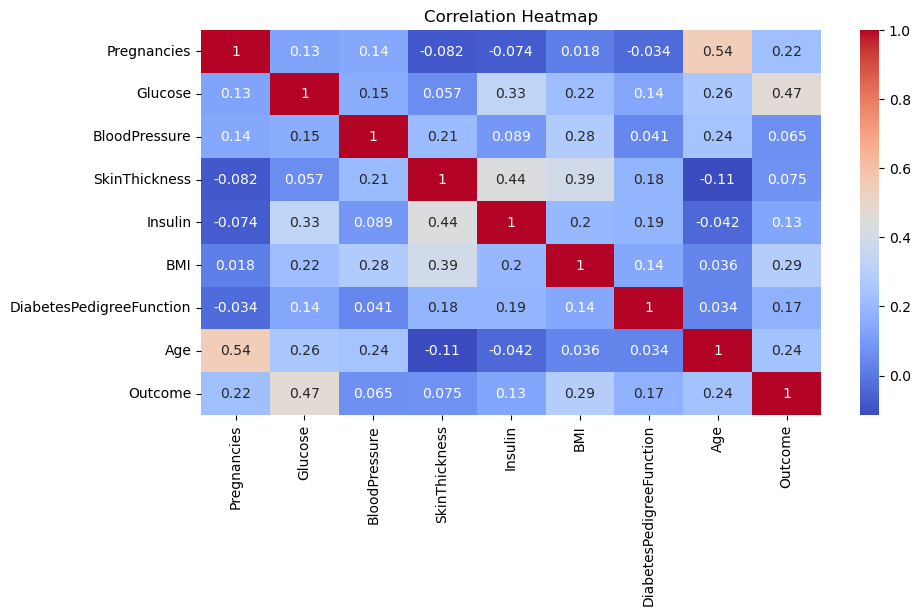

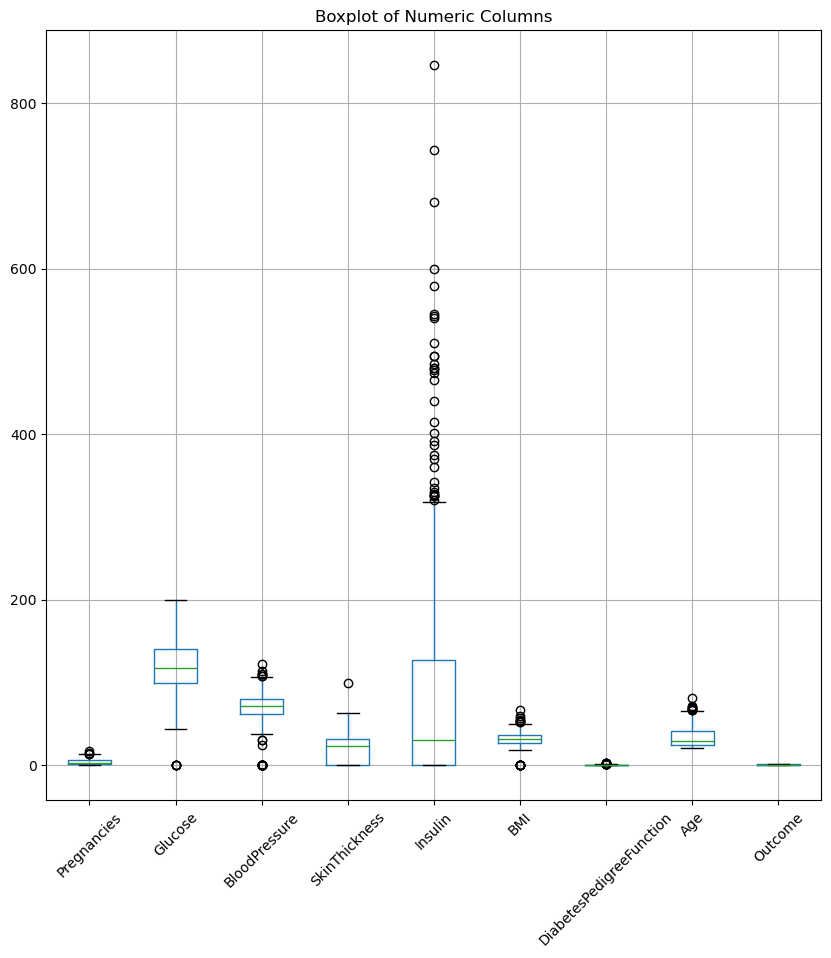

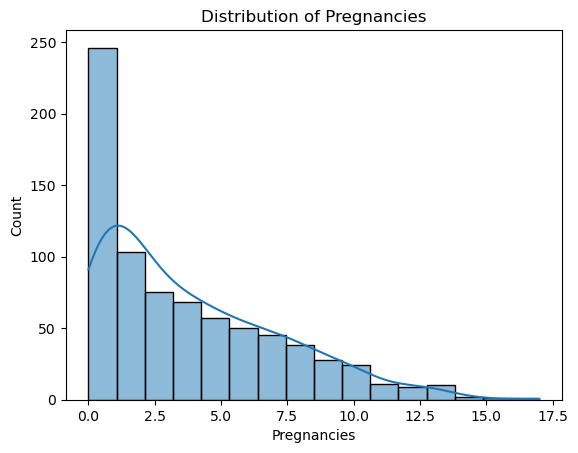

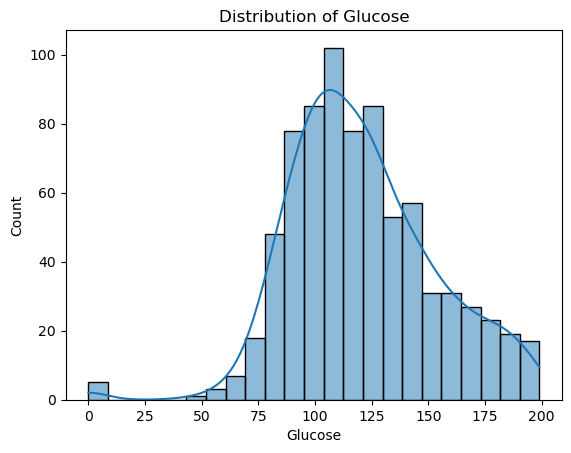

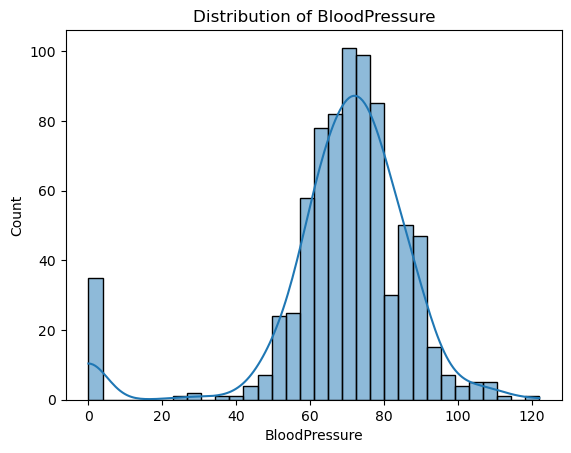

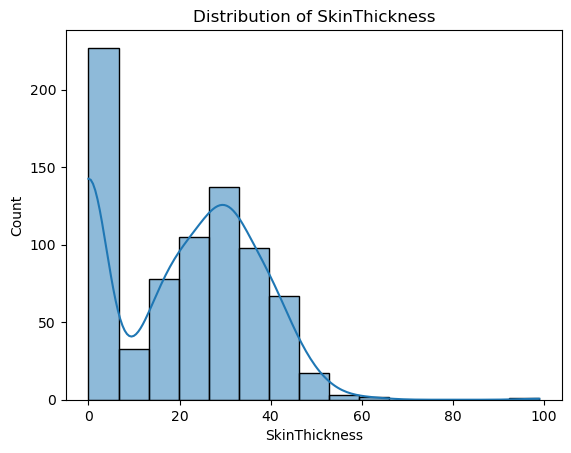

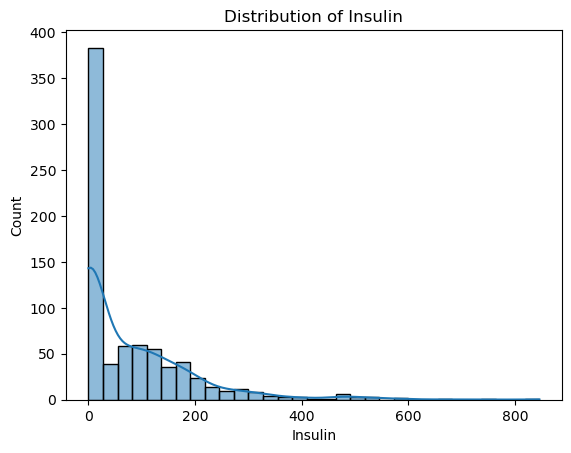

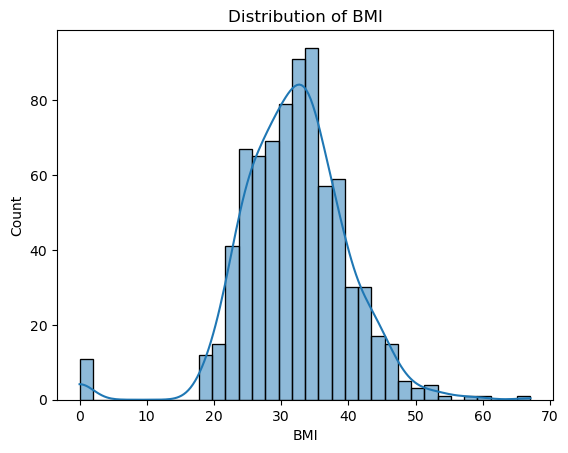

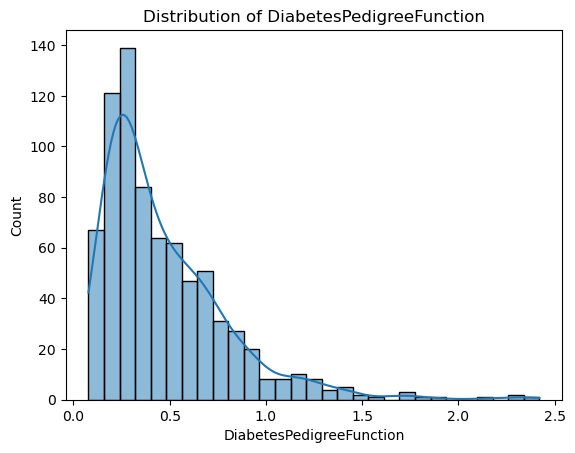

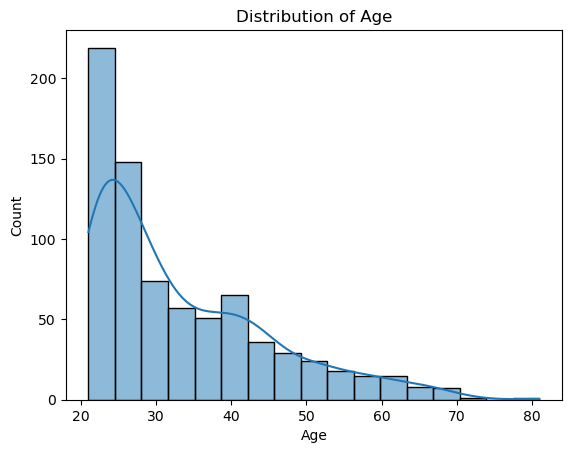

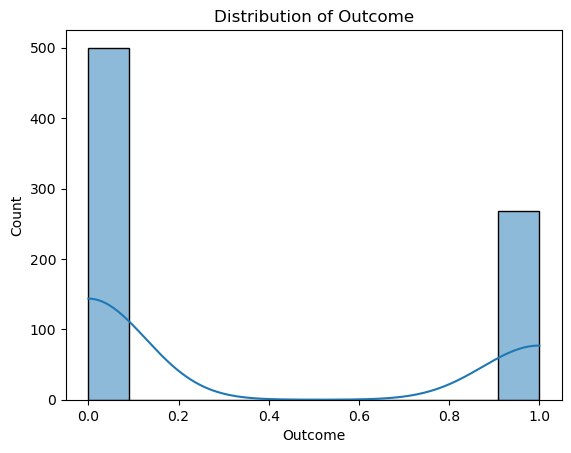

In [12]:
def validate_data(data):
    """
  Performs a comprehensive validation of a pandas data frame to ensure data quality.

  Args:
      data (pandas.DataFrame): The DataFrame to be validated.

  Returns:
      None (This function performs data validation and visualization but does not return a value)

  This function performs the following data validation checks and visualizations:

      1. Missing Values: Identifies and displays the missing values in each column.
      2. Data Types: Shows the data type of each column.
      3. Data Duplicates: Counts and displays the number of duplicate rows in the DataFrame.
      4. Descriptive Statistics: Generates summary statistics for numerical columns (mean, standard deviation, etc.).
      5. Feature Correlations: Calculates and visualizes the correlation matrix to identify potential relationships between features.
      6. Outlier Visualization: Creates boxplots for each numeric column to visualise outliers.
      7. Distribution Visualization: Generates histograms with kernel density estimation (KDE) to visualize the distribution of each numeric column.

  By performing these checks and visualizations, this function provides valuable insights into the data quality and helps identify potential issues before using the data for further analysis or modelling.
  """
    # Check for missing values.
    print("Missing Values:\n", data.isnull().sum(), "\n")
    # Check data types.
    print("Data Type:\n", data.dtypes, "\n")
    # Check for data duplicates
    print("Number of Duplicates:\n", data.duplicated().sum(), "\n")
    # Descriptive Statistics.
    print("Descriptive Statistics:\n", data.describe(), "\n")
    # Check for correlation in the dataset to identify features to be used in training the model.
    print("Feature Correlations:\n", data.corr(), "\n")
    plt.figure(figsize=(10, 5))
    sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
    plt.title("Correlation Heatmap")
    plt.show()
    # Visualise outliner for each numeric column
    numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
    data[numeric_columns].boxplot(figsize=(10, 10))
    plt.title("Boxplot of Numeric Columns")
    plt.xticks(rotation=45, fontsize=10)
    plt.show()
    # Visualise distribution for each numeric column
    for column in numeric_columns:
        sns.histplot(data[column], kde=True)
        plt.title(f"Distribution of {column}")
        plt.show()
data = pd.read_csv(r"C:\Users\okwuk\OneDrive\Desktop\Project Data sets\Logistics regression data set\diabetes.csv") # Load the data set.
validate_data(data) # Run the validation.

In [13]:
# Dropping the target variable
datal = data.drop(columns=['Outcome', "SkinThickness"])

In [14]:
datal.head(5)

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,0,33.6,0.627,50
1,1,85,66,0,26.6,0.351,31
2,8,183,64,0,23.3,0.672,32
3,1,89,66,94,28.1,0.167,21
4,0,137,40,168,43.1,2.288,33


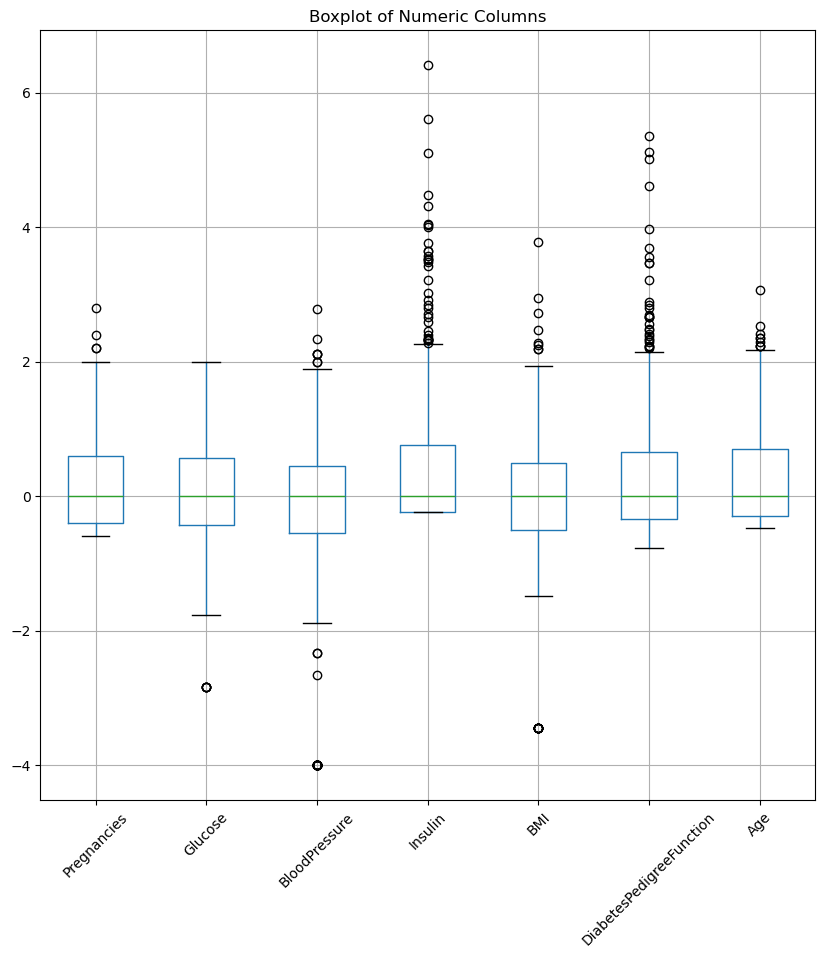

In [15]:
# Due to the presence of outliners as seen in the boxplot, Robust scalers will be used.
# This method reduces the influence of extreme values on the scaling process.

# Applying Robust Scalers
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaled_data = scaler.fit_transform(datal)

# Transform back to a DataFrame
data_pd = pd.DataFrame(scaled_data, columns=datal.columns)

# Visualizing the boxplot
numeric_columns = data_pd.select_dtypes(include=['float64', 'int64']).columns
data_pd[numeric_columns].boxplot(figsize=(10, 10))
plt.title("Boxplot of Numeric Columns")
plt.xticks(rotation=45, fontsize=10)
plt.show()

# Adding the target column back
X = data_pd.values
y = data["Outcome"].values

# data_np = data_pd.to_numpy()

In [16]:
# Check the shape of X and y before splitting.
print("X shape before splitting into train and test:", X.shape)
print("y Shape before splitting into train and test:", y.shape, "\n")

# Splitting the array into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42 
)

# Check the shape of X and y after splitting.
print("Train set size after splitting into train and test:", X_train.shape, y_train.shape)
print("Test set size after splitting into train and test:", X_test.shape, y_test.shape, "\n")

# Distinguish m and n for X_train only.
print("Number of training examples(m):", X_train.shape[0])
print("Number of features(n):", X_train.shape[1], "\n")

X shape before splitting into train and test: (768, 7)
y Shape before splitting into train and test: (768,) 

Train set size after splitting into train and test: (614, 7) (614,)
Test set size after splitting into train and test: (154, 7) (154,) 

Number of training examples(m): 614
Number of features(n): 7 



In [17]:
def zscore_normalise_features(X_train):
    """ Computes X and uses the zscore technique to normalise the features.

    Args:
        X (ndarray(m,n))   : Input data, m examples, n features

    Returns:
        X_norm (ndarray(m,n))   : Input data norm by column
        mu (ndarray(n,))        : Mean of each feature
        sigma (ndarray(n,))     : Standard deviation of each feature """

     
    #find the mean of each column/feature in the array X.
    mu = np.mean(X_train, axis=0)        # mu will have shape (n,).
    # find the standard deviation of each column/feature.
    sigma = np.std(X_train, axis=0)     # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_train_nr = (X_train - mu) / sigma     # zscore normaliseing technique formula.

    return (X_train_nr, mu, sigma)

In [18]:
X_norm, X_mu, X_sigma = zscore_normalise_features(X_train)
print(f"X_mu = {X_mu}, \nX_sigma = {X_sigma}", "\n")
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}", "\n")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}", "\n")
print(f"Confirmimg the shape of normalised X: {X_norm.shape}")

X_mu = [ 0.1485342   0.09345573 -0.14359392  0.4002995  -0.00178628  0.25272615
  0.2298333 ], 
X_sigma = [0.66211299 0.77597476 1.02763984 0.91269268 0.83164721 0.87992766
 0.67612147] 

Peak to Peak range by column in Raw        X:[3.4        4.82424242 6.77777778 6.64833006 7.21505376 6.12287582
 3.52941176] 

Peak to Peak range by column in Normalized X:[5.13507518 6.21700945 6.5954798  7.28430307 8.67561829 6.95838541
 5.22008529] 

Confirmimg the shape of normalised X: (614, 7)


In [19]:
# Updating X_train with normalised data.
X_train = X_norm

In [20]:
# confirming class of X-train, y_train, X_test and y_test
# Using a dictionary to check all types
variables ={"X_train": X_train, "y_train": y_train, "X_test": X_test, "y_test": y_test}
for name, variables in variables.items():
    print(f"Type of {name}, {type(variables)}")

Type of X_train, <class 'numpy.ndarray'>
Type of y_train, <class 'numpy.ndarray'>
Type of X_test, <class 'numpy.ndarray'>
Type of y_test, <class 'numpy.ndarray'>


In [21]:
# Checking data types of both X_train, X_test, y_train and y_test.
variables ={"X_train": X_train, "y_train": y_train, "X_test": X_test, "y_test": y_test}
for name, variables in variables.items():
    print(f"Type of {name}, {variables.dtype}")

Type of X_train, float64
Type of y_train, int64
Type of X_test, float64
Type of y_test, int64


In [22]:
# Viewing the first 5 rows of our training example.
print(X_train[:5])

[[-0.52639686 -1.15139792 -3.75268255 -0.70120553 -4.13525578 -0.49073479
  -1.03594038]
 [ 1.58804586 -0.27664283  0.68034485 -0.70120553 -0.48916881  2.41502991
   1.48710085]
 [-0.82846011  0.56687102 -1.2658623   0.01344832 -0.42452187  0.54916055
  -0.94893896]
 [-1.13052335  1.2541786  -1.04961706 -0.70120553 -1.30372015 -0.63929127
   2.79212217]
 [ 0.68185612  0.41066475  0.57222224  2.48460077  1.83812075 -0.68682934
   1.13909516]]


In [23]:
# Let define the sigmoid function.
def sigmoid(z):
    """ 
    Compute the sigmoid z:

    Args:
        z (ndarray): A scalar, numpy array of any size

    Returns:
        g (ndarray): sigmoid(z) with the same shape as z
        
    """

    g = 1/(1+np.exp(-z))

    return g

In [24]:
# Initialising parameters
m = X_train.shape[0] # moving the training example into m
n = X_train.shape[1] # moving the features into n
w = np.zeros((n,))   # w is the weight of the features, and therefore, it will be initialised to have a format of ndarray with shape n 
b = 0.0              # b is the bias, which is a single scalar or float figure but should be initialised to 0.0.
alpha = 0.05              
num_iters = 20000
lambda_ = 1

In [25]:
# Compute cost function for logistics regression with lambda.
def compute_cost_logistics_lam(X_train, y_train, w, b, lambda_):
    """ 
    Compute the cost (J)

    Args:
        X_train (ndarray(m,n)): Data, m examples with n features
        y_train (ndarray(m,)) : target values with shape m
        w (ndarray(n,))       : model parameter with shape n
        b (Scalar)            : model parameter
        lambda_ (scalar): Controls amount of regularization
    Returns: 
        cost(scalar): cost
    """
    # initialise cost to zero
    cost = 0.0
    #epsilon = 1e-10  # Small value to avoid log(0)
    for i in range(m):
        z_i = np.dot(X_train[i],w) + b
        f_wb_i = sigmoid(z_i)
        # Apply the sigmoid function and clip the output to avoid extremes
        #f_wb_i = np.clip(sigmoid(z_i), epsilon, 1 - epsilon)
        cost += -y_train[i]*np.log(f_wb_i) - (1-y_train[i])*np.log(1-f_wb_i)
    cost = cost / m

    reg_cost = 0
    for j in range(n):
        reg_cost += (w[j]**2)
    reg_cost = (lambda_/(2*m)) * reg_cost

    cost = cost + reg_cost
    return cost

In [26]:
# Compute and display cost using our pre-chosen optimal parameters. 
cost = compute_cost_logistics_lam(X_train, y_train, w, b, lambda_)
print(f'Cost at pre-chosen optimal parameters : {cost}')

Cost at pre-chosen optimal parameters : 0.6931471805599468


In [27]:
# Compute gradient descent with lambda
def compute_gradient_logistics_lam(X_train, y_train, w, b, lambda_):
    """ 
    Computes the gradient for logistic regression

    Args:
        X_train (ndarray(m,n)): Data, m examples with n features
        y_train (ndarray(m,)) : target values with shape m
        w (ndarray(n,))       : model parameter with shape n
        b (Scalar)            : model parameter
    
    Returns: 
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar)      : The gradient of the cost w.r.t. the parameter b. 
    """
    # initialise dj_wb and dj_db
    dj_dw = np.zeros((n,))
    dj_db = 0.0

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X_train[i],w) + b)
        err_i = f_wb_i - y_train[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X_train[i,j]
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m
    dj_db = dj_db/m

    for j in range(n):
        dj_dw[j] = dj_dw[j] + (lambda_/m) * w[j]

    return dj_dw, dj_db

In [28]:
#Compute and display gradient 
tmp_dj_dw, tmp_dj_db = compute_gradient_logistics_lam(X_train, y_train, w, b, lambda_)
print(f'dj_db at initial w,b: {tmp_dj_db}')  # Should be a scalar
print(f'dj_dw at initial w,b: \n{tmp_dj_dw}')  # Should be a vector

dj_db at initial w,b: 0.15309446254071662
dj_dw at initial w,b: 
[-0.09879095 -0.21710507 -0.03905261 -0.05164325 -0.14581114 -0.07356821
 -0.13358737]


In [29]:
def gradient_descent_logistics_lam(X_train, y_train, w, b, alpha, num_iters):
    """
    Performs batch gradient descent to learn w and b. Updates w and b by taking 
    num_iters gradient steps with learning rate alpha.
    
    Args:
     X_train (ndarray (m,n))        : Data, m examples with n features
     y_train (ndarray (m,))         : Target values
     w (ndarray (n,))               : Initial model parameters  
     b (scalar)                     : Initial model parameter
     cost_function_logistics        : Function to compute cost
     gradient_function_logistics    : Function to compute the gradient
     alpha (float)                  : Learning rate
     num_iters (scalar)             : Number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,))              : Updated values of parameters 
      b (scalar)                    : The updated value of the parameter 
    """
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []

    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_dw, dj_db = compute_gradient_logistics_lam(X_train, y_train, w, b, lambda_)

        # Update Parameters using w, b, alpha, and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db   

        # Store and print the cost every 100 iterations
        if i % 100 == 0:
            cost_val = compute_cost_logistics_lam(X_train, y_train, w, b, lambda_)
            J_history.append(cost_val)

                # Check for convergence
        #if i > 0 and abs(J_history[-1] - J_history[-2]) < threshold:
            #print(f"Gradient descent converged at iteration {i}")
            #break
             # Optional: Print progress every 100 iterations
        if i % 100 == 0:
            print(f"Iteration {i}: Cost={cost_val:.4f}, b={b:.2f}")
            print(f"w: {w.flatten()}")

    return w, b, J_history

In [30]:
w_final, b_final, cost_hist = gradient_descent_logistics_lam(X_train, y_train, w, b, alpha, num_iters)

Iteration 0: Cost=0.6868, b=-0.01
w: [0.00493955 0.01085525 0.00195263 0.00258216 0.00729056 0.00367841
 0.00667937]
Iteration 100: Cost=0.5047, b=-0.47
w: [ 0.18402467  0.55567451 -0.01580099  0.03592833  0.37909735  0.16133321
  0.28018262]
Iteration 200: Cost=0.4813, b=-0.66
w: [ 0.20721325  0.75603697 -0.0889118  -0.02217467  0.52838657  0.19954463
  0.34286899]
Iteration 300: Cost=0.4743, b=-0.75
w: [ 0.21208555  0.8645578  -0.1398655  -0.07147987  0.61559007  0.2145971
  0.37029145]
Iteration 400: Cost=0.4717, b=-0.80
w: [ 0.21338095  0.93096505 -0.17317778 -0.10638217  0.67180877  0.22205419
  0.38577122]
Iteration 500: Cost=0.4706, b=-0.83
w: [ 0.21373108  0.97376035 -0.19510753 -0.13023287  0.7093898   0.22629624
  0.39544518]
Iteration 600: Cost=0.4701, b=-0.85
w: [ 0.21378451  1.00206881 -0.20975923 -0.14644585  0.73492249  0.22892029
  0.40177742]
Iteration 700: Cost=0.4699, b=-0.86
w: [ 0.21374307  1.02107625 -0.21967146 -0.15748968  0.75241678  0.23062604
  0.40602834]
It

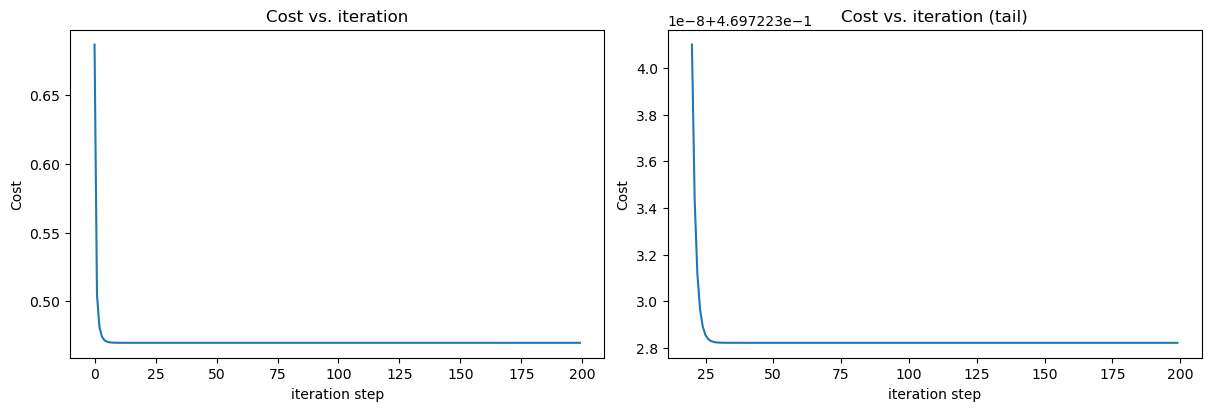

In [31]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(cost_hist)
ax2.plot(20 + np.arange(len(cost_hist[20:])), cost_hist[20:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

In [32]:
# 5. Print results
print("\nAfter gradient descent:")
print(f"w: {w_final.flatten()}")
print(f"b: {b_final:.2f}")
print(f"Final cost: {compute_cost_logistics_lam(X_train, y_train, w_final, b_final, lambda_):.4f}")


After gradient descent:
w: [ 0.21335214  1.06204765 -0.24154562 -0.18166841  0.79160183  0.23426971
  0.41555961]
b: -0.89
Final cost: 0.4697


In [33]:
#Compare with skleearn.
from sklearn.linear_model import LogisticRegression

# Initialize and fit the logistic regression model from Scikit-learn
model = LogisticRegression(random_state=42, max_iter=3000, solver='lbfgs')
model.fit(X_train, y_train)

# Extract weights (coefficients) and bias (intercept) from the trained model
print("Scikit-learn w (weights):", model.coef_)
print("Scikit-learn b (bias):", model.intercept_)

Scikit-learn w (weights): [[ 0.213314    1.06245314 -0.24153029 -0.1821728   0.79116567  0.23410925
   0.41550747]]
Scikit-learn b (bias): [-0.88580539]


In [34]:
manual_preds = sigmoid(np.dot(X_train, w_final) + b_final) >= 0.5
# model accuracy
print(f"Manual Model Accuracy: {np.mean(manual_preds == y_train) * 100:.2f}%")

Manual Model Accuracy: 77.20%


In [35]:
# This code is crucial for checking If the model is predicting reasonable probabilities
# If the z values are within a good range for learning
# If the logistic regression model is learning effectively over iterations
for i in range(num_iters):
    z = np.dot(X_train, w_final) + b_final
print(f"Min sigmoid output: {np.min(sigmoid(z))}, Max sigmoid output: {np.max(sigmoid(z))}")
print(f"Iteration {i}: Min z = {np.min(z)}, Max z = {np.max(z)}")

Min sigmoid output: 0.002388499320206367, Max sigmoid output: 0.9910447570286139
Iteration 19999: Min z = -6.034698653410474, Max z = 4.706520529182583


In [36]:
# Normalise X_test
def zscore_normalise_features(X_test):
    """
    Computes X_test and uses the zscore technique to normalise the features.

    Args:
        X_test (ndarray(m,n))   : Input data, m examples, n features

    Returns:
        sigma (ndarray(n,))     : Standard deviation of each feature
    """
    #find the mean of each column/feature in the array X.
    mu = np.mean(X_test, axis=0)        # mu will have shape (n,).
    # find the standard deviation of each column/feature.
    sigma = np.std(X_test, axis=0)     # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_test_norm1 = (X_test - X_mu) / X_sigma     # zscore normaliseing technique formula.

    return (X_test_norm1)

In [37]:
X_test_norm = zscore_normalise_features(X_test)

In [38]:
X_test = X_test_norm

In [39]:
def predict(X_test, w_final, b_final):
    z = np.dot(X_test, w_final) + b_final  # Compute linear function
    probability = sigmoid(z)  # Apply sigmoid activation
    return [1 if p >= 0.5 else 0 for p in probability]  # Convert probability to class (0 or 1)

# Predict labels for test data
y_pred = predict(X_test, w_final, b_final)

# Display first 10 predictions
print("1 = Diabetic", "0 = Non-Diabetic ", "\n")
for i in range(10):  
    print(f"Predicted: {y_pred[i]}, Actual: {y_test[i]}",)

1 = Diabetic 0 = Non-Diabetic  

Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 1, Actual: 0
Predicted: 1, Actual: 0
Predicted: 1, Actual: 0


Accuracy: 0.7532

Confusion Matrix:
[[79 20]
 [18 37]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



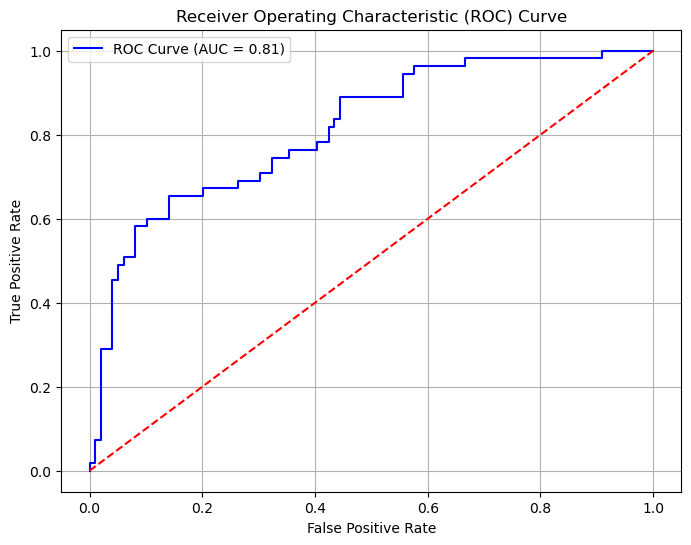

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

# Generate predictions
y_pred = model.predict(X_test)  # Predict class labels
y_prob = model.predict_proba(X_test)  # Predict probabilities for each class

# Evaluate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Generate Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

# ROC Curve and AUC Score (for binary classification)
y_prob_positive = y_prob[:, 1]  # Probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob_positive)  # Calculate ROC curve
auc = roc_auc_score(y_test, y_prob_positive)  # Calculate AUC

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line for reference
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.grid()
plt.show()
# Why Is the Classification Report Important?
# Precision and recall for each class show how well the model handles class imbalances
# F1-score balances false positives and false negatives, which is crucial in sensitive applications like medical diagnosis.
# Instead of just accuracy, it provides a deeper understanding of model performance for each class.

In [41]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation results
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation of CV Accuracy: {np.std(cv_scores):.4f}")

Cross-Validation Accuracy Scores: [0.75609756 0.80487805 0.73170732 0.7398374  0.79508197]
Mean CV Accuracy: 0.7655
Standard Deviation of CV Accuracy: 0.0294


In [42]:
# The mean accuracy of 76.% aligns closely with your test set accuracy (75.32%), indicating that the model is not overfitting or underfitting.
# The low standard deviation implies that your model performs consistently across different data splits, which is a positive sign of robustness.
# Although the model is performing well, there is still room to improve accuracy, particularly for the minority class (Diabetic cases). 
# Techniques like handling class imbalance or exploring more complex models may help.